# Final Project ---> Classification of Mushrooms (EE - 559)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
train_data = pd.read_csv("./dataset/mushroom_train.csv")
print("Train Data -> 1: ")
train_data.head()


Train Data -> 1: 


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,4.98,c,i,y,f,a,c,n,6.04,6.21,w,f,f,d,a,p
1,2.84,x,y,y,f,a,c,w,5.66,3.55,y,t,r,h,u,p
2,11.44,x,y,y,f,a,c,w,7.03,25.29,n,t,e,d,w,e
3,8.77,s,t,r,t,d,c,g,4.44,13.61,r,f,f,d,a,p
4,7.55,x,d,n,t,p,c,y,8.41,18.44,y,f,f,d,a,e


In [3]:
X_train = train_data.drop('class', axis=1)  # Select all the features except labels,
y_train = train_data['class']  # Select only the 'class' column.

In [4]:
categoricalFeatures = [col for col in X_train.columns if X_train[col].dtype == "float64"]
numericalFeatures = [col for col in X_train.columns if X_train[col].dtype == "object"]

classes, class_index, class_count = np.unique(y_train, return_index=True, return_counts=True, axis=None)

## Initial Observations

### General Information about the Data

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          42748 non-null  float64
 1   cap-shape             42748 non-null  object 
 2   cap-surface           42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       42748 non-null  object 
 6   gill-spacing          42748 non-null  object 
 7   gill-color            42748 non-null  object 
 8   stem-height           42748 non-null  float64
 9   stem-width            42748 non-null  float64
 10  stem-color            42748 non-null  object 
 11  has-ring              42748 non-null  object 
 12  ring-type             42748 non-null  object 
 13  habitat               42748 non-null  object 
 14  season                42748 non-null  object 
dtypes: float64(3), obje

In [6]:
print("##### Initial Observations from the data ######")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"Shape of the Train Data: {train_data.shape}")
print(f"Total number of Data-Points in the Train Data, N: {train_data.shape[0]}")
print(f"Total number of dimesions in the Train Data, D: {train_data.shape[1]}")

print()

print(f"Categorical Features: {categoricalFeatures}")
print(f"Numerical Features: {numericalFeatures}")
print(f"Total number of Categorical Features: {len(categoricalFeatures)}")
print(f"Total number of Numerical Features: {len(numericalFeatures)}")

print()

print(f"Total number of classes in the Dataset, C: {len(classes)}")
print(f"Output Labels in the Train Data, T: {classes}")
print(f"Total Number of data-points corressponding to each class: { dict(zip(classes, class_count))}")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

##### Initial Observations from the data ######
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Shape of the Train Data: (42748, 16)
Total number of Data-Points in the Train Data, N: 42748
Total number of dimesions in the Train Data, D: 16

Categorical Features: ['cap-diameter', 'stem-height', 'stem-width']
Numerical Features: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
Total number of Categorical Features: 3
Total number of Numerical Features: 12

Total number of classes in the Dataset, C: 2
Output Labels in the Train Data, T: ['e' 'p']
Total Number of data-points corressponding to each class: {'e': 19153, 'p': 23595}
-----------------------------------------------------------------------------------------------------------

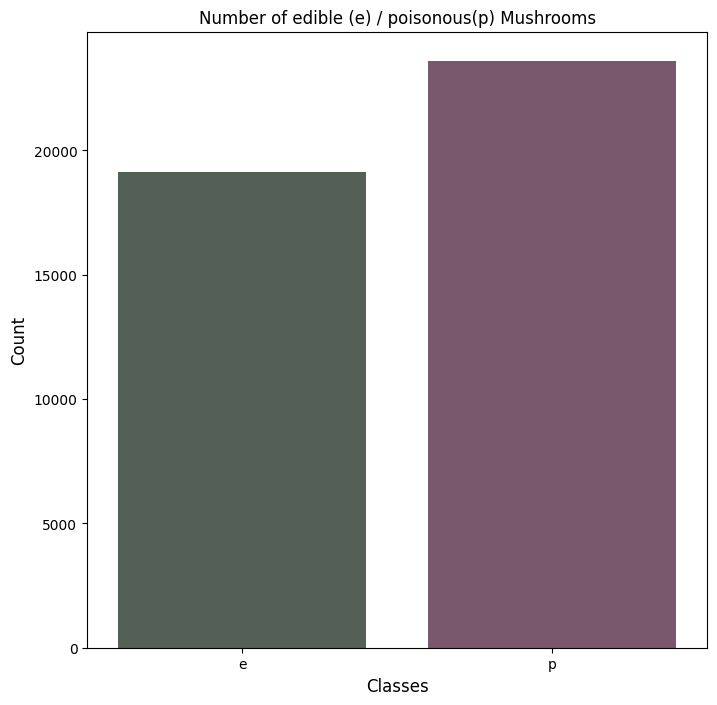

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x=classes, y=class_count, alpha=0.8, palette=["#263A29", "#5F264A"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Classes (e and p)', fontsize=12)
plt.title("Number of edible (e) / poisonous(p) Mushrooms")

plt.show()

### Checking for null values in the input features.


In [8]:
train_data.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64

### Checking the number of unique values in every single input feature.

In [9]:
train_data.nunique(axis=0)


cap-diameter            2390
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2079
stem-width              4261
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
class                      2
dtype: int64

### Checking for duplicate rows in the input feature space.

In [10]:
duplicate_rows = train_data.duplicated()
train_data[duplicate_rows]


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
2586,3.23,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,u,p
6909,4.41,o,s,g,f,f,f,f,0.0,0.0,f,t,f,d,s,p
8004,2.88,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,s,p
11144,3.06,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,a,p
12012,2.93,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,a,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41759,3.03,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,u,p
41835,4.59,o,s,w,f,a,c,w,0.0,0.0,f,f,f,d,u,p
41850,3.83,o,t,n,f,a,c,w,0.0,0.0,f,f,f,d,u,p
42323,3.91,o,s,w,f,a,c,w,0.0,0.0,f,f,f,d,a,p


### Analysing the  Input Features which are Numerical.

In [11]:
train_data.describe()


,cap-diameter,stem-height,stem-width
count,42748.000000,42748.000000,42748.000000
mean,6.714149,6.583224,12.117692
std,5.220008,3.368333,10.004874
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.180000
50%,5.865000,5.960000,10.200000
75%,8.530000,7.750000,16.540000
max,62.340000,33.920000,103.910000


### Checking for Inconsistencies in the Input Features which are Categorical.

['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

### Feature : cap-shape

In [12]:
pd.crosstab(index = train_data["cap-shape"], columns= "cap-shape")

col_0,cap-shape
cap-shape,
b,4043
c,1288
f,9289
o,2417
p,1824
s,5079
x,18808


### Feature : cap-surface

In [13]:
pd.crosstab(index = train_data["cap-surface"], columns= "cap-surface")

col_0,cap-surface
cap-surface,
d,3125
e,1789
g,3280
h,3482
i,1599
k,1602
l,1007
s,5341
t,15569


### Feature: cap-color

In [14]:
pd.crosstab(index = train_data["cap-color"], columns= "cap-color")

col_0,cap-color
cap-color,
b,870
e,2781
g,3072
k,907
l,580
n,16960
o,2581
p,1161
r,1227


### Feature: does-bruise-or-bleed

In [15]:
pd.crosstab(index = train_data["does-bruise-or-bleed"], columns= "does-bruise-or-bleed")

col_0,does-bruise-or-bleed
does-bruise-or-bleed,
f,35279
t,7469


### Feature: gill-attachment

In [16]:
pd.crosstab(index = train_data["gill-attachment"], columns= "gill-attachment")

col_0,gill-attachment
gill-attachment,
a,15844
d,7133
e,3998
f,2501
p,4185
s,3913
x,5174


### Feature: gill-spacing

In [17]:
pd.crosstab(index = train_data["gill-spacing"], columns= "gill-spacing")

col_0,gill-spacing
gill-spacing,
c,34791
d,5456
f,2501


### Feature: gill-color

In [18]:
pd.crosstab(index = train_data["gill-color"], columns= "gill-color")

col_0,gill-color
gill-color,
b,662
e,756
f,2501
g,2860
k,1697
n,6742
o,2041
p,4178
r,962


### Feature: stem-color

In [19]:
pd.crosstab(index = train_data["stem-color"], columns= "stem-color")

col_0,stem-color
stem-color,
b,125
e,1431
f,745
g,1841
k,599
l,150
n,12678
o,1512
p,710


### Feature: has-ring

In [20]:
pd.crosstab(index = train_data["has-ring"], columns= "has-ring")

col_0,has-ring
has-ring,
f,32085
t,10663


### Feature: ring-type

In [21]:
pd.crosstab(index = train_data["ring-type"], columns= "ring-type")

col_0,ring-type
ring-type,
e,1703
f,35581
g,888
l,998
m,240
p,907
r,1013
z,1418


### Feature: habitat

In [22]:
pd.crosstab(index = train_data["habitat"], columns= "habitat")

col_0,habitat
habitat,
d,30945
g,5486
h,1444
l,2244
m,2041
p,245
u,84
w,259


### Feature: season

In [23]:
pd.crosstab(index = train_data["season"], columns= "season")

col_0,season
season,
a,21053
s,1961
u,16065
w,3669


In [24]:
print("No missing data was present in the Train Data!")
print(f"Total number of duplicate records in the Train Data: {train_data.duplicated().sum()} records")

No missing data was present in the Train Data!
Total number of duplicate records in the Train Data: 88 records


In [25]:
mean_df = train_data.groupby(['cap-color'], as_index=True).mean(numeric_only = True)

In [26]:
mean_df

,cap-diameter,stem-height,stem-width
cap-color,,,
b,6.510402,5.338805,11.441805
e,6.697515,7.001737,11.717958
g,6.086038,5.628662,10.945146
k,7.648787,5.407310,13.931444
l,6.262138,5.686948,11.029690
n,6.696215,7.121494,12.838238
o,5.964866,6.243890,10.173072
p,6.124513,5.443790,10.243118
r,7.586129,6.292005,13.033749
